<a href="https://colab.research.google.com/github/Harsh-Patel-227/YBI-projects/blob/main/Harsh_Patel_Big_Sales_Prediction_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Big Sales Prediction using random forest regressor

Import Library

In [ ]:
import pandas as pd
import numpy as np


Import Data

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

Describe Data

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Data Preprocessing

In [ ]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'), inplace=True)

In [ ]:
df[['Item_Weight']].value_counts()

Item_Weight
13.194406      346
12.867687      335
13.332012      261
12.566713      250
13.238358      195
              ... 
7.145000         7
7.850000         6
9.035000         6
4.615000         6
30.000000        1
Name: count, Length: 432, dtype: int64

In [ ]:
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)
df.replace({'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1}}, inplace=True)

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
Name: count, dtype: int64

In [ ]:
df.replace({'Item_Type': {'Fruits and Vegetables': 0, 'Snack Foods': 0, 'Household': 1,
                          'Frozen Foods': 0, 'Baking Goods': 0, 'Canned': 0, 'Health and Hygiene': 1,
                          'Meat': 0, 'Soft Drinks': 0, 'Breads': 0, 'Hard Drinks': 0, 'Others': 2,
                          'Starchy Foods': 0, 'Breakfast': 0, 'Seafood': 0, 'Dairy': 0}}, inplace=True)

In [ ]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
Name: count, dtype: int64

In [ ]:
df.replace({'Outlet_Identifier': {'OUT027': 0, 'OUT013': 1, 'OUT049': 2,
                                  'OUT046': 3, 'OUT035': 4, 'OUT045': 5, 'OUT018': 6,
                                  'OUT017': 7, 'OUT010': 8, 'OUT019': 9}}, inplace=True)

In [ ]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Name: count, Length: 1559, dtype: int64

In [ ]:
df.replace({'Outlet_Size': {'Small': 0, 'Medium': 1, 'High': 2}}, inplace=True)

In [ ]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
Name: count, dtype: int64

In [ ]:
df.replace({'Outlet_Location_Type': {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}}, inplace=True)

In [ ]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
Name: count, dtype: int64

In [ ]:
df.replace({'Outlet_Type': {'Grocery Store': 0, 'Supermarket Type1': 1,
                            'Supermarket Type2': 2, 'Supermarket Type3': 3}}, inplace=True)

In [ ]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
Name: count, dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,2,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.353351,0.065953,0.208814,141.004977,4.128415,1997.830681,0.720079,1.112856,1.201281,2185.836320
std,4.251186,0.478027,0.051459,0.452384,62.086938,2.717103,8.371664,0.648279,0.812755,0.796543,1827.479550
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.300000,0.000000,0.027036,0.000000,94.012000,2.000000,1987.000000,0.000000,0.000000,1.000000,922.135101
50%,12.800000,0.000000,0.054021,0.000000,142.247000,4.000000,1999.000000,1.000000,1.000000,1.000000,1768.287680
75%,16.000000,1.000000,0.094037,0.000000,185.855600,6.000000,2004.000000,1.000000,2.000000,1.000000,2988.110400
max,30.000000,1.000000,0.328391,2.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,31224.726950


Define X and y

In [ ]:
y = df['Item_Outlet_Sales']

In [ ]:
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_std = sc.fit_transform(X[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

In [ ]:
X.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = X_std

Train Test SPlit

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2529)

Modeling

In [ ]:
rfr = RandomForestRegressor(random_state=2529)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=2529)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
y_pred.shape

(1421,)

In [ ]:
y_pred

array([1445.29507934,  669.51312572, 1883.54185796, ..., 2228.46101734,
       3251.93307564,  460.5156873 ])

Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

1611177.5560500463

In [ ]:
mean_absolute_error(y_test, y_pred)

828.3494726840753

In [ ]:
r2_score(y_test, y_pred)

0.5806344037136959

Prediction

In [ ]:
import matplotlib.pyplot as plt

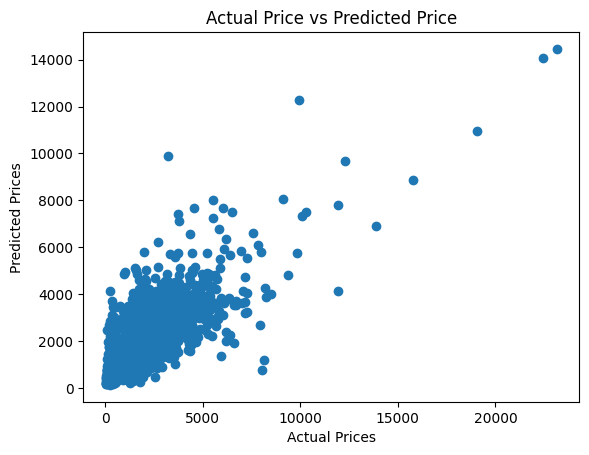

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()